In [288]:
# Importing all essential libraries
# Importing the 3 Seattle AirBnB Datasets

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None) # Allows us to see all columns on df during EDA
df_calendar= pd.read_csv('/Users/basharkhaddage/Desktop/Udacity - Data Science Nanodegree/Project 1/calendar.csv')
df_listings= pd.read_csv('/Users/basharkhaddage/Desktop/Udacity - Data Science Nanodegree/Project 1/listings.csv')
df_reviews= pd.read_csv('/Users/basharkhaddage/Desktop/Udacity - Data Science Nanodegree/Project 1/reviews.csv')

In [34]:
# Checking the shape of our datasets
print(df_calendar.shape)
print(df_listings.shape)
print(df_reviews.shape)

(1393570, 4)
(3818, 92)
(84849, 6)


In [35]:
# Let's explore the caledar dataset
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


## How do prices vary across the year ?

Lets explore pricing and try to find some answers to questions like:
1) How do prices trend over the year?
2) Are some months particularly more expensive?

In [801]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [37]:
# Whilst we have a large proportion of null values, our df is still large enough to derive meaningful insights
# we will drop the null values in 'price'
df_calendar_dropped = df_calendar.dropna(how = 'any')

In [38]:
df_calendar_dropped.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


In [39]:
# Creating a copy
df_calendar_dropped_copy = df_calendar_dropped.copy()

In [40]:
# Let's create 2 additional columns: 'year' and 'month'
df_calendar_dropped_copy['year'] = df_calendar_dropped_copy['date'].apply(lambda x : x[0:4])
df_calendar_dropped_copy['month'] = df_calendar_dropped_copy['date'].apply(lambda x : x[5:7])

# Here we'll slice the '$' sign off
df_calendar_dropped_copy['price'] = df_calendar_dropped_copy['price'].apply(lambda x : x[1:])

In [41]:
df_calendar_dropped_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  934542 non-null  int64 
 1   date        934542 non-null  object
 2   available   934542 non-null  object
 3   price       934542 non-null  object
 4   year        934542 non-null  object
 5   month       934542 non-null  object
dtypes: int64(1), object(5)
memory usage: 49.9+ MB


In [42]:
# Arranging the df in a clearer manner

df_calendar_dropped_copy = df_calendar_dropped_copy[['listing_id',"date",'year','month','available','price']]
df_calendar_dropped_copy.head()

,listing_id,date,year,month,available,price
0,241032,2016-01-04,2016,01,t,85.00
1,241032,2016-01-05,2016,01,t,85.00
9,241032,2016-01-13,2016,01,t,85.00
10,241032,2016-01-14,2016,01,t,85.00
14,241032,2016-01-18,2016,01,t,85.00


In [43]:
# Some more columns data type transformations

df_calendar_dropped_copy['price'] = df_calendar_dropped_copy['price'] \
.replace('[\$,]', '', regex=True).astype(float)
df_calendar_dropped_copy['month'] = df_calendar_dropped_copy['month'].astype(int)
df_calendar_dropped_copy['year'] = df_calendar_dropped_copy['year'].astype(int)

In [44]:
df_calendar_dropped_copy.head()

,listing_id,date,year,month,available,price
0,241032,2016-01-04,2016,1,t,85.0
1,241032,2016-01-05,2016,1,t,85.0
9,241032,2016-01-13,2016,1,t,85.0
10,241032,2016-01-14,2016,1,t,85.0
14,241032,2016-01-18,2016,1,t,85.0


In [45]:
df_calendar_dropped_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   listing_id  934542 non-null  int64  
 1   date        934542 non-null  object 
 2   year        934542 non-null  int64  
 3   month       934542 non-null  int64  
 4   available   934542 non-null  object 
 5   price       934542 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 49.9+ MB


In [46]:
df_calendar_dropped_copy.groupby(['year','month'])['price'].agg(['mean','count'])

mean  count
year month                   
2016 1      121.568409  59239
     2      124.293927  73321
     3      128.644488  83938
     4      135.097005  76037
     5      139.538183  79971
     6      147.473137  77244
     7      152.094150  74222
     8      150.656594  76347
     9      143.255949  77246
     10     137.031939  82438
     11     135.688738  81780
     12     137.251835  87061
2017 1      136.882590   5698

In [50]:
# We'll drop 2017 data as it seems the count is a fraction compared to others & this could have skewed the data

grouped_data_calender = df_calendar_dropped_copy.groupby(['year','month'])['price'].agg(['mean','count']) \
.reset_index().drop(index = 12, axis = 0)
grouped_data_calender

,year,month,mean,count
0,2016,1,121.568409,59239
1,2016,2,124.293927,73321
2,2016,3,128.644488,83938
3,2016,4,135.097005,76037
4,2016,5,139.538183,79971
5,2016,6,147.473137,77244
6,2016,7,152.094150,74222
7,2016,8,150.656594,76347
8,2016,9,143.255949,77246
9,2016,10,137.031939,82438


In [238]:
# Circuling back to my initial question: 'What is the seasonal variation in pricing?'
# We can clearly see here that June / July / August are more expensive, on average, vs. the other months.

yearly_average = grouped_data_calender['mean'].mean()
summer = grouped_data_calender.query('month == [6,7,8]')['mean'].mean() # June / July / August average price
rest_of_year = grouped_data_calender.query('month == [1,2,3,4,5,9,10,11,12]')['mean'].mean() # Rest of year average price

print(summer)
print(yearly_average)

150.07462709628
137.71619613287837


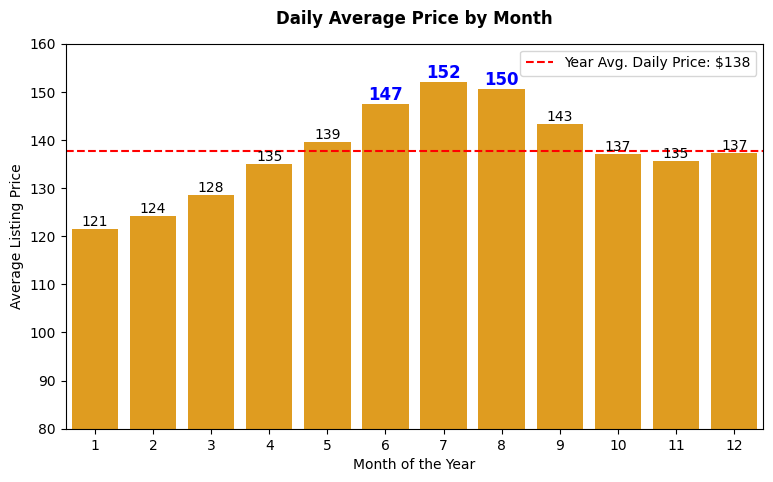

In [244]:
# Lets try to visualise all our findings in one clean graph that captures our findings !

plt.figure(figsize = (9, 5))
ax = sns.barplot(data = grouped_data_calender, x = 'month', y = 'mean', color = 'orange')

# Set the y-axis limits (minimum and maximum values) for better visualization
plt.ylim(80, 160)

plt.ylabel('Average Listing Price')
plt.xlabel('Month of the Year')
plt.title('Daily Average Price by Month', fontweight = 'heavy', y=1.03)

# Annotate the bars with their corresponding integer values
# highlight the top 3 months

data_sorted = grouped_data_calender.sort_values(by = 'mean', ascending = False)
for index, row in data_sorted.iterrows():
    font_weight = 'bold' if row.name in [5, 6, 7] else 'normal'  # Set 'bold' for top 3 bars, 'normal' for others
    text_color = 'blue' if row.name in [5, 6, 7] else 'black'  # Set 'blue' for top 3 bars, 'black' for others
    font_size = 12 if row.name in [5,6,7] else 10 # Set fontsize 12 for top 3 bars, 10 for others
    ax.text(index, row['mean'], int(row['mean']), ha = 'center', va = 'bottom', fontsize = font_size,
            fontweight = font_weight, color = text_color)
    
# Adding the yearly average price line
plt.axhline(y = yearly_average, color = 'red', linestyle = '--', label = 'Year Avg. Daily Price: $138')
plt.legend()
plt.show()

Looking at the above chart, and based on this dataset, June / July / August are the top 3 most expensive months to book, which probably makes sense given it's the summer season.

Perhaps more interestingly, the start of the year rates are at their lowest, and slowly but surely keep rising and begin to taper off by end of summer.


## What attributes are associated with Superhosts?

Lets explore Superhosts and try to find some answers to questions like:
1) How prevalent are superhosts?
2) Are superhosts more highly rated?
3) More interestingly perhaps, Do the top neighbourhoods show any particular trend in concentration of superhosts?

In [572]:
df_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [573]:
df_listings.shape

(3818, 92)

In [574]:
df_listings_copy = df_listings.copy()

In [575]:
df_listings_copy = df_listings_copy[['neighbourhood', 'review_scores_rating', 'host_is_superhost']]
df_listings_copy.head()

,neighbourhood,review_scores_rating,host_is_superhost
0,Queen Anne,95.0,f
1,Queen Anne,96.0,t
2,Queen Anne,97.0,f
3,Queen Anne,NaN,f
4,Queen Anne,92.0,f


In [576]:
df_listings_copy['host_is_superhost'].value_counts()

f    3038
t     778
Name: host_is_superhost, dtype: int64

In [577]:
df_listings_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   neighbourhood         3402 non-null   object 
 1   review_scores_rating  3171 non-null   float64
 2   host_is_superhost     3816 non-null   object 
dtypes: float64(1), object(2)
memory usage: 89.6+ KB


In [578]:
# Checking for null values
df_listings_copy.isnull().sum()

neighbourhood           416
review_scores_rating    647
host_is_superhost         2
dtype: int64

In [579]:
# We'll drop the 2 null values for 'host_is_superhost' since it is only 2 records
# We'll also convert the 't' and 'f' to 0 and 1: 0 being False, 1 being True

df_listings_copy.dropna(subset = 'host_is_superhost', inplace = True)

In [580]:
df_listings_copy.isnull().sum()

neighbourhood           416
review_scores_rating    645
host_is_superhost         0
dtype: int64

In [581]:
df_listings_copy['host_is_superhost'].value_counts()

f    3038
t     778
Name: host_is_superhost, dtype: int64

In [582]:
df_listings_copy['host_is_superhost'] = df_listings_copy['host_is_superhost'] \
.apply(lambda x: 1 if x == 't' else 0)
df_listings_copy['host_is_superhost'].value_counts()

0    3038
1     778
Name: host_is_superhost, dtype: int64

In [583]:
# Checking our dataset now after applying the above:

df_listings_copy.head()

,neighbourhood,review_scores_rating,host_is_superhost
0,Queen Anne,95.0,0
1,Queen Anne,96.0,1
2,Queen Anne,97.0,0
3,Queen Anne,NaN,0
4,Queen Anne,92.0,0


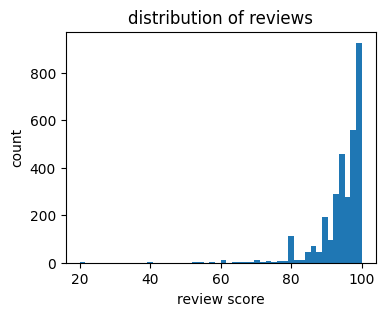

In [584]:
# Now we'll see how to handle null values for review_score_ratings
# First, let's look at review_score_ratings visually on a histogram to see how our data is distributed

plt.figure(figsize = (4,3))
plt.hist(df_listings_copy['review_scores_rating'], bins = 50)
plt.xlabel('review score')
plt.ylabel('count')
plt.title('distribution of reviews');

In [585]:
# As seen in the hist plot, our data is heavily negatively skewed due to some extreme anamolies / outliers
# Lets check some measures of central tendency & dispersion in our review_scores_rating column

print(df_listings_copy['review_scores_rating'].describe())

count    3171.000000
mean       94.539262
std         6.606083
min        20.000000
25%        93.000000
50%        96.000000
75%        99.000000
max       100.000000
Name: review_scores_rating, dtype: float64


In [586]:
# We can build a function that gets rid outliers
df
def outliers_three_std(df, column_name):
    '''
    This function serves to identify and return values that are over
    3 standard deviations from the mean.
    
    It takes two inputs: df, column_name, then checks if that specific column
    in that df has any values that are beyond 3 std's from the mean.
    '''
    # Calculate the mean and standard deviation of the column
    mean_val = df[column_name].mean()
    std_val = df[column_name].std()

    # Define the threshold for outliers (3 standard deviations from the mean)
    threshold = 3 * std_val

    # Filter the DataFrame to include only the rows where the column value exceeds the threshold
    outliers = df_listings_copy[abs(df_listings_copy['review_scores_rating'] - mean_val) > threshold]
    
    return outliers

In [587]:
# Using the newly created function to identify the values over 3 std's away from the mean

outliers_three_std(df_listings_copy, 'review_scores_rating')
outliers_three_std(df_listings_copy, 'review_scores_rating').index

Int64Index([ 145,  352,  716,  718,  732,  735,  748,  750,  754,  756,  789,
             790,  805,  806,  911,  969, 1076, 1124, 1126, 1153, 1162, 1188,
            1190, 1219, 1222, 1231, 1480, 1512, 1520, 1666, 1972, 1975, 2089,
            2176, 2232, 2320, 2447, 2464, 2474, 2495, 2609, 2628, 2661, 2688,
            2716, 2723, 2742, 2776, 2777, 2859, 3148, 3614],
           dtype='int64')

In [588]:
# Dropping them

df_listings_copy2 = df_listings_copy.drop(index = outliers_three_std(df_listings_copy, 'review_scores_rating') \
                                          .index, axis = 0).copy()
df_listings_copy2.head()

,neighbourhood,review_scores_rating,host_is_superhost
0,Queen Anne,95.0,0
1,Queen Anne,96.0,1
2,Queen Anne,97.0,0
3,Queen Anne,NaN,0
4,Queen Anne,92.0,0


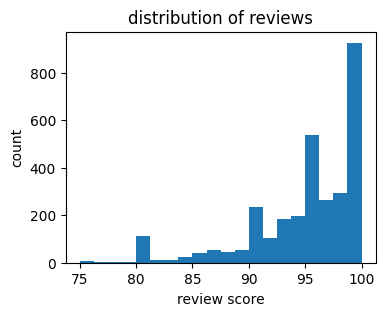

In [589]:
# histogram after removing our extreme values
# We still have negatively skewed shape for our review_scores_rating distribution

plt.figure(figsize = (4,3))
plt.hist(df_listings_copy2['review_scores_rating'], bins = 20)
plt.xlabel('review score')
plt.ylabel('count')
plt.title('distribution of reviews');

In [590]:
df_listings_copy2['review_scores_rating'].describe()

count    3119.000000
mean       95.052260
std         5.131012
min        75.000000
25%        93.000000
50%        96.000000
75%       100.000000
max       100.000000
Name: review_scores_rating, dtype: float64

In [592]:
# Since the data is negatively skewed, we'll use the median to impute missing values

df_listings_copy2['review_scores_rating'] = df_listings_copy2['review_scores_rating'].fillna(96)

In [593]:
df_listings_copy2.isnull().sum()

neighbourhood           408
review_scores_rating      0
host_is_superhost         0
dtype: int64

In [597]:
# Lastly, we'll explore the 'neighbourhood' column / values
# Deal with null values

df_listings_copy2['neighbourhood'].nunique()

81

In [602]:
# we have 400+ null values here that we can fill out with the mode
# However, this would immensely increase Capitol Hill as the most popular neighbourhood
# We can drop the NaN values to preserve the actual trend in our data

df_listings_copy2['neighbourhood'].value_counts()[0:10]

Capitol Hill           343
Ballard                212
Belltown               200
Minor                  191
Queen Anne             187
Fremont                148
Wallingford            142
First Hill             104
Stevens                 97
University District     95
Name: neighbourhood, dtype: int64

In [605]:
df_listings_copy2 = df_listings_copy2.dropna(subset = 'neighbourhood')

In [607]:
df_listings_copy2.isnull().sum()

neighbourhood           0
review_scores_rating    0
host_is_superhost       0
dtype: int64

In [614]:
# Now that we've fixed our dataset, Let's explore our new df

df_listings_copy2.head()

,neighbourhood,review_scores_rating,host_is_superhost
0,Queen Anne,95.0,0
1,Queen Anne,96.0,1
2,Queen Anne,97.0,0
3,Queen Anne,96.0,0
4,Queen Anne,92.0,0


In [628]:
# Percentage of Super Hosts
df_listings_copy2['host_is_superhost'].value_counts()[1] / df_listings_copy2['host_is_superhost'].value_counts()[0]

0.27073078379401744

In [633]:
# Superhosts tend to be more highly rated
df_listings_copy2.groupby('host_is_superhost')['review_scores_rating'].agg('mean').to_frame()

,review_scores_rating
host_is_superhost,
0,94.601287
1,97.430769


In [680]:
# Grouping our data in a manner to see each neighborhood's count of superhosts (and the mean score)
# Lets look at the top 10 most popualar destinations and their 'Superhost' split

df_grouped = df_listings_copy2.groupby(['neighbourhood','host_is_superhost'])\
                        ['review_scores_rating'].agg(['mean','count'])
df_grouped

mean  count
neighbourhood  host_is_superhost                  
Alki           0                  95.850000     20
               1                  96.666667      3
Arbor Heights  0                  98.000000      2
               1                  98.000000      1
Atlantic       0                  94.641026     39
...                                     ...    ...
Westlake       0                  96.181818     11
               1                  98.000000      1
Windermere     0                  98.000000      9
               1                  90.000000      1
Yesler Terrace 0                  97.333333     12

[149 rows x 2 columns]

In [685]:
# Top 20 destinations
df_listings_copy2['neighbourhood'].value_counts()[0:20].index
top_20_cities = df_listings_copy2['neighbourhood'].value_counts()[0:20].index
top_20_cities

Index(['Capitol Hill', 'Ballard', 'Belltown', 'Minor', 'Queen Anne', 'Fremont',
       'Wallingford', 'First Hill', 'Stevens', 'University District',
       'North Beacon Hill', 'Lower Queen Anne', 'Central Business District',
       'Greenwood', 'Columbia City', 'Phinney Ridge', 'Ravenna', 'Magnolia',
       'Green Lake', 'Atlantic'],
      dtype='object')

In [721]:
# Splitting our data by True / False (superhost)
# Finding the percentage of superhosts to non-superhosts

df_grouped_top_20 = df_grouped.query('neighbourhood in @top_20_cities')
superhost_false = df_grouped_top_20.query('host_is_superhost == 0').reset_index()
superhost_true = df_grouped_top_20.query('host_is_superhost == 1').reset_index()

findings = []
for i in range(0, 20):
    a = (superhost_true.iloc[i,0] ,(superhost_true.iloc[i,3] / superhost_false.iloc[i,3]))
    findings.append(a)
findings

[('Atlantic', 0.28205128205128205),
 ('Ballard', 0.36774193548387096),
 ('Belltown', 0.2345679012345679),
 ('Capitol Hill', 0.2206405693950178),
 ('Central Business District', 0.234375),
 ('Columbia City', 0.4634146341463415),
 ('First Hill', 0.25301204819277107),
 ('Fremont', 0.30973451327433627),
 ('Green Lake', 0.3333333333333333),
 ('Greenwood', 0.21875),
 ('Lower Queen Anne', 0.2857142857142857),
 ('Magnolia', 0.3170731707317073),
 ('Minor', 0.37410071942446044),
 ('North Beacon Hill', 0.21794871794871795),
 ('Phinney Ridge', 0.3333333333333333),
 ('Queen Anne', 0.2635135135135135),
 ('Ravenna', 0.2222222222222222),
 ('Stevens', 0.10227272727272728),
 ('University District', 0.05555555555555555),
 ('Wallingford', 0.30275229357798167)]

In [788]:
# Sorting through them to have them in the same order as the top_20_cities to create findings_sorted

findings_sorted = []

for city in top_20_cities:
    for i,j in findings:
        if city == i:
            var = (i, j)
            findings_sorted.append(var)
            
# creating 2 lists: one for the cities, and one for the percentage for that specific city

cities = []
percentage = []
for i in range(len(findings_sorted)):
    cities.append(findings_sorted[i][0])
    percentage.append(findings_sorted[i][1].round(2))

remaining = []
for i in range(len(percentage)):
    x = 1 - percentage[i]
    remaining.append(x)

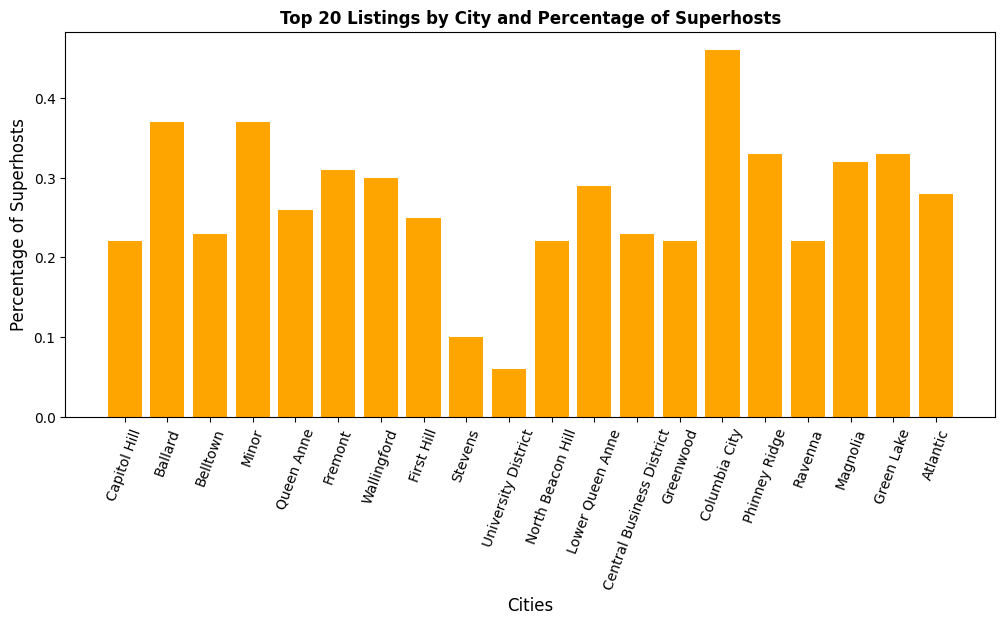

In [799]:
plt.figure(figsize = (12,5))
plt.bar(cities, percentage, color = 'orange')
plt.xlabel('Cities', fontsize = 12)
plt.ylabel('Percentage of Superhosts', fontsize = 12)
plt.title('Top 20 Listings by City and Percentage of Superhosts', fontweight = 'bold')
plt.xticks(rotation = 70);

# As we can see in the below visual, there is no particular trend here that we can infer

In [804]:
# Top 20 cities percentage of Superhosts

superhost_false = df_grouped_top_20.query('host_is_superhost == 0').reset_index()
superhost_true = df_grouped_top_20.query('host_is_superhost == 1').reset_index()
superhost_true['count'].sum() / superhost_false['count'].sum()

0.2627388535031847

In [822]:
# Remaining cities percentage of Superhosts

df_listings_copy2['neighbourhood'].value_counts()[20:].index
remainder_cities = df_listings_copy2['neighbourhood'].value_counts()[20:].index
remainder = df_grouped.query('neighbourhood in @remainder_cities')
remainder_false = remainder.query('host_is_superhost == 0').reset_index()
remainder_true = remainder.query('host_is_superhost == 1').reset_index()
remainder_true['count'].sum() / remainder_false['count'].sum()

0.2906208718626156

To answer our original questions:

1) Superhosts are marginally higher rated than non-superhosts
2) No clear pattern / trend emerged for superhosts in the most popular neighbourhoods
3) Superhosts are not more 'concentrated' in the top 20 cities when compared to the rest

## How are property types distributed ? 

1) What are the different property types in Seattle's Airbnb scene?
2) What are some key interesting features about the various types of propoerties?
3) Are there any particular trends with property types?

In [860]:
df_listings[['property_type', 'neighbourhood', 'price', 'amenities']].isnull().sum()

property_type      1
neighbourhood    416
price              0
amenities          0
dtype: int64

In [861]:
# As we did before, we'll drop the NaN values in 'neighbourhood', as to not fill it with mean / median & skew data
# We'll drop the 1 missing property_type as well

df_listings_property_type = df_listings[['property_type', 'neighbourhood', 'price', 'amenities']].dropna()
df_listings_property_type.isnull().sum()

property_type    0
neighbourhood    0
price            0
amenities        0
dtype: int64

In [862]:
# Converting 'price' to float
df_listings_property_type['price'] = df_listings_property_type['price'] \
                                    .str.replace('$', '').str.replace(',', '').astype(float)

/var/folders/f9/yr8f8sks06l5j44pmr6pvfr40000gn/T/ipykernel_3508/1461930631.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listings_property_type['price'] = df_listings_property_type['price'] \


In [876]:
# Grouping by apartment types
# Showing max / min / mean / count for 'price'
# Sorting by highest count value

df_listings_property_type.groupby(by = 'property_type')['price'].agg(['max','min','mean','count']) \
                .reset_index().sort_values('count', ascending = False).reset_index().drop('index', axis = 1)

,property_type,max,min,mean,count
0,House,1000.0,25.0,133.230720,1556
1,Apartment,999.0,20.0,124.585317,1512
2,Townhouse,498.0,33.0,134.254717,106
3,Condominium,700.0,50.0,155.698795,83
4,Bed & Breakfast,299.0,39.0,116.314286,35
5,Loft,425.0,49.0,135.970588,34
6,Cabin,300.0,52.0,103.650000,20
7,Other,170.0,39.0,97.062500,16
8,Bungalow,349.0,65.0,119.000000,12
9,Camper/RV,265.0,45.0,99.555556,9


In [948]:
# Property_type 'Apartment' distribution in Seattle
apartment_percentage = df_listings_property_type.query('property_type == "Apartment"')['neighbourhood'].value_counts() / 1556
apartment = list(zip(apartment_percentage.index, list(apartment_percentage)))

In [990]:
# Property_type 'House' distribution in Seattle
house_percentage = df_listings_property_type.query('property_type == "House"')['neighbourhood'].value_counts() / 1551
house = list(zip(house_percentage.index, list(house_percentage)))

In [998]:
top_ten_apartments = apartment[0:10]
top_ten_apartments

[('Capitol Hill', 0.16323907455012854),
 ('Belltown', 0.11632390745501285),
 ('First Hill', 0.062339331619537273),
 ('Queen Anne', 0.056555269922879174),
 ('Central Business District', 0.04820051413881748),
 ('Fremont', 0.04627249357326478),
 ('University District', 0.04627249357326478),
 ('Lower Queen Anne', 0.038560411311053984),
 ('Ballard', 0.03598971722365039),
 ('Minor', 0.03406169665809768)]

In [1017]:
top_ten_houses = house[0:10]
top_ten_houses

[('Ballard', 0.08768536428110896),
 ('Minor', 0.07092198581560284),
 ('Wallingford', 0.06318504190844616),
 ('Capitol Hill', 0.052869116698903935),
 ('Queen Anne', 0.050934880722114766),
 ('North Beacon Hill', 0.038039974210186976),
 ('Fremont', 0.038039974210186976),
 ('Greenwood', 0.03481624758220503),
 ('Stevens', 0.032237266279819474),
 ('Ravenna', 0.030303030303030304)]

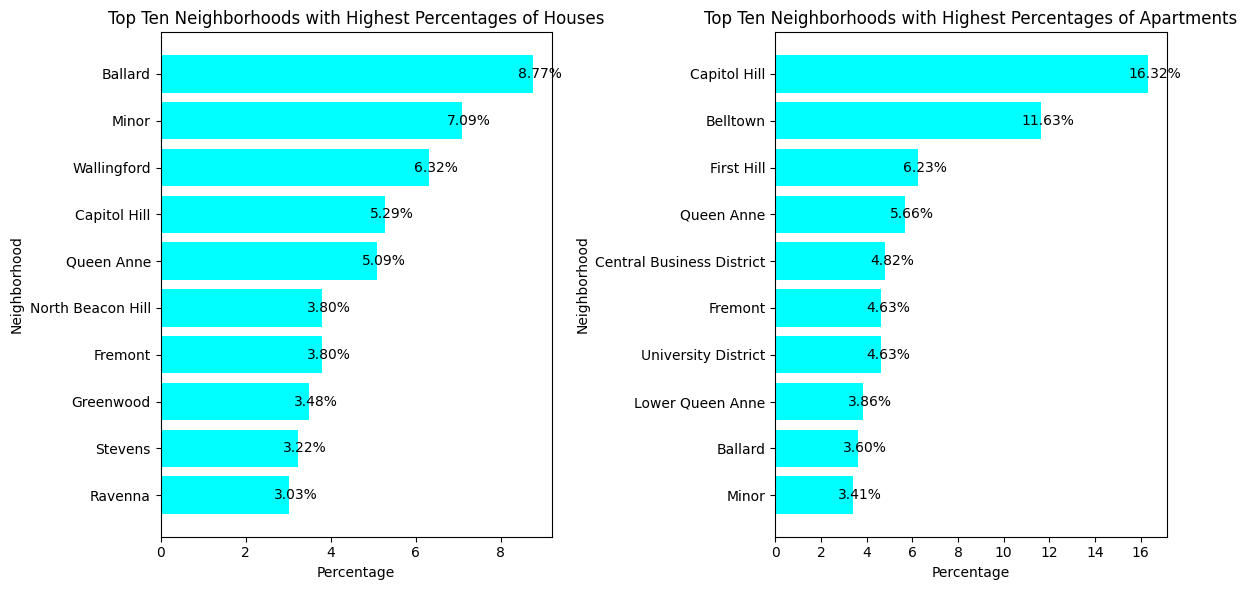

In [1051]:
# Data for the first plot (houses)
neighbourhood1 = [x[0] for x in top_ten_houses]
percentage1 = [x[1]*100 for x in top_ten_houses]

# Data for the second plot (apartments)
neighbourhood2 = [x[0] for x in top_ten_apartments]
percentage2 = [x[1]*100 for x in top_ten_apartments]

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for houses
bars1 = axs[0].barh(neighbourhood1[::-1], percentage1[::-1], color='aqua')
axs[0].set_xlabel('Percentage')
axs[0].set_ylabel('Neighborhood')
axs[0].set_title('Top Ten Neighborhoods with Highest Percentages of Houses')

for bar in bars1:
    percentage = bar.get_width()
    axs[0].annotate(f'{percentage:.2f}%', 
                    xy=(percentage, bar.get_y() + bar.get_height() / 2), 
                    xytext=(5, 0),
                    textcoords='offset points', 
                    ha='center', 
                    va='center', 
                    fontsize=10)

# Plot for apartments
bars2 = axs[1].barh(neighbourhood2[::-1], percentage2[::-1], color='aqua')
axs[1].set_xlabel('Percentage')
axs[1].set_ylabel('Neighborhood')
axs[1].set_title('Top Ten Neighborhoods with Highest Percentages of Apartments')

for bar in bars2:
    percentage = bar.get_width()
    axs[1].annotate(f'{percentage:.2f}%', 
                    xy=(percentage, bar.get_y() + bar.get_height() / 2), 
                    xytext=(5, 0),
                    textcoords='offset points', 
                    ha='center', 
                    va='center', 
                    fontsize=10)

plt.tight_layout()
plt.show()

Circuling back to the original questions - 

Seattle'a Airbnb scene has a 16 types of listings to offer, albeit, apartments & houses are the dominating majority.

One would expect that perhaps houses or condos would be on average drastically more expensive than apartments for example, however, the data shows that the average Airbnb price in Seattle is fairly consistent. Granted, the price range of each listing vary's between property type quite a bit.

Last but not least, we zeroed in the top 10 neighborhoods & looked in more detail at their property type breakdown, specifically apartments & houses, and we noticed that the ratio changes from property type in one neighbourhood to another
